# Comparing hypervolumes of the different experiments

In [1]:
import pandas as pd

In [14]:
# hard-coded values
data_file = "../data/hypervolumes-pareto-fronts/opti_eu27.csv"
objective_columns = ["mean_soja", "std_soja", "total_surface"]
experiment2objectives = {
    'ps' : ["mean_soja", "total_surface"],
    'pv' : ["mean_soja", "std_soja"],
    'pvs' : ["mean_soja", "std_soja", "total_surface"]
}

In [3]:
df = pd.read_csv(data_file)

In [16]:
for experiment, objectives in experiment2objectives.items() :
    # select rows related to that experiment
    df_experiment = df[df["opti_criteria"] == experiment]
    # check the type of constraints
    constraints = df_experiment["surface_constraint"].unique()

    for constraint in constraints :
        print("Now considering experiment \"%s\" and surface constraint \"%s\"..." % (experiment, constraint))
        df_selected = df_experiment[df_experiment["surface_constraint"] == constraint]

        # check the types of algorithms involved
        algorithms = df_selected["algo"].unique()
        for algorithm in algorithms :
            df_algorithm = df_selected[df_selected["algo"] == algorithm]
            print("- For algorithm \"%s\", we have %d points" % (algorithm, df_algorithm.shape[0]))
        

Now considering experiment "ps" and surface constraint "A"...
- For algorithm "lin", we have 2616 points
- For algorithm "nsga", we have 1000 points
Now considering experiment "ps" and surface constraint "B"...
- For algorithm "lin", we have 2616 points
- For algorithm "nsga", we have 1000 points
Now considering experiment "pv" and surface constraint "A"...
- For algorithm "lin", we have 200 points
- For algorithm "nsga", we have 1000 points
Now considering experiment "pv" and surface constraint "B"...
- For algorithm "lin", we have 500 points
- For algorithm "nsga", we have 1000 points
Now considering experiment "pvs" and surface constraint "A"...
- For algorithm "lin", we have 993 points
- For algorithm "nsga", we have 5000 points
Now considering experiment "pvs" and surface constraint "B"...
- For algorithm "lin", we have 993 points
- For algorithm "nsga", we have 1000 points


# Ad-hoc checks to understand what is going on with values

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')

In [18]:
# hard-coded values
data_file = "../data/hypervolumes-pareto-fronts/opti_eu27.csv"
objective_columns = ["mean_soja", "std_soja", "total_surface"]
experiment2objectives = {
    'ps' : ["mean_soja", "total_surface"],
    'pv' : ["mean_soja", "std_soja"],
    'pvs' : ["mean_soja", "std_soja", "total_surface"]
}

In [19]:
df = pd.read_csv(data_file)

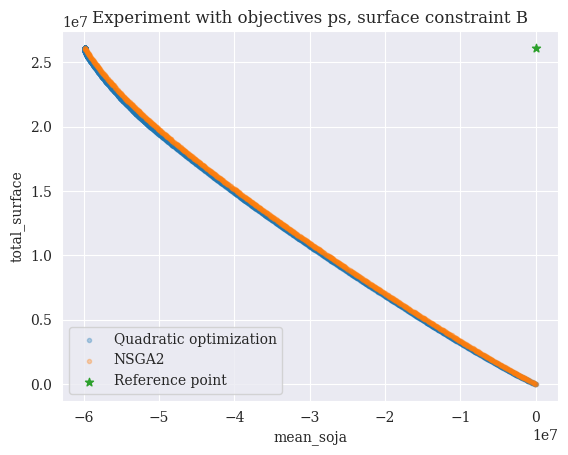

In [42]:
# let's check one particular case, and compute everything
experiment = "ps"
constraint = "B"
df_experiment = df[(df["opti_criteria"] == experiment) & (df["surface_constraint"] == constraint)]


df_lin = df_experiment[df_experiment["algo"] == "lin"]
x_lin = -1 * df_lin["mean_soja"].values
y_lin = df_lin["total_surface"].values
pf_lin = df_lin[["mean_soja", "total_surface"]].values
pf_lin[:,0] = -1 * pf_lin[:,0]

df_nsga = df_experiment[df_experiment["algo"] == "nsga"]
x_nsga = -1 * df_nsga["mean_soja"].values
y_nsga = df_nsga["total_surface"].values
pf_nsga = df_nsga[["mean_soja", "total_surface"]].values
pf_nsga[:,0] = -1 * pf_nsga[:,0]

# let's now compute the hypervolume; we can generate a reference point (minimum of all minima of all algorithms)
x_reference = max(max(x_lin), max(x_nsga))
y_reference = max(max(y_lin), max(y_nsga))

fig, ax = plt.subplots()
ax.scatter(x_lin, y_lin, marker='.', alpha=0.3, label="Quadratic optimization")
ax.scatter(x_nsga, y_nsga, marker='.', alpha=0.3, label="NSGA2")
ax.scatter(x_reference, y_reference, marker='*', label="Reference point")

ax.set_title("Experiment with objectives %s, surface constraint %s" % (experiment, constraint))
ax.set_xlabel("mean_soja")
ax.set_ylabel("total_surface")
ax.legend(loc='best')

In [55]:
# and now, let's try and compare the two hypervolumes
import numpy as np
from pymoo.indicators.hv import HV
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_experiment[["mean_soja", "total_surface"]].values)
pf_lin_norm = scaler.transform(pf_lin)
pf_nsga_norm = scaler.transform(pf_nsga)

ref_point = np.array([x_reference, y_reference])

ref_point_norm = np.array([1,1])
ref_point_norm = np.array([max(max(pf_lin_norm[:,0]), max(pf_nsga_norm[:,0])), max(max(pf_lin_norm[:,1]), max(pf_nsga_norm[:,1]))])
hv_experiment = HV(ref_point=ref_point_norm)

hv_lin = hv_experiment(pf_lin_norm)
hv_nsga = hv_experiment(pf_nsga_norm)

print("Hypervolume of Pareto front: Quadratic Programming=%.4f, NSGA2=%.4f" % (hv_lin, hv_nsga))

Hypervolume of Pareto front: Quadratic Programming=0.5698, NSGA2=0.5613


In [37]:
from pymoo.problems import get_problem
from pymoo.visualization.scatter import Scatter

# The pareto front of a scaled zdt1 problem
pf = get_problem("zdt1").pareto_front()

# The result found by an algorithm
A = pf[::10] * 1.1

# plot the result
Scatter(legend=True).add(pf, label="Pareto-front").add(A, label="Result").show()
ref_point = np.array([1.2, 1.2])

ind = HV(ref_point=ref_point)
print("HV", ind(A))

HV 0.9631646448182305


In [38]:
print(A)

[[0.         1.1       ]
 [0.11111111 0.75039705]
 [0.22222222 0.60558677]
 [0.33333333 0.49446993]
 [0.44444444 0.4007941 ]
 [0.55555556 0.31826404]
 [0.66666667 0.24365116]
 [0.77777778 0.17503754]
 [0.88888889 0.11117354]
 [1.         0.05119115]]
